<a href="https://colab.research.google.com/github/dlezcan1/machine-learning-fall-2021-final-project/blob/main/ExploratoryAnalyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Uploading Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import h5py
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from random import sample

hf = h5py.File("/content/drive/MyDrive/egfr_erbB1.h5", "r")
list(hf.keys())

train = pd.read_csv('/content/drive/MyDrive/egfr_erbB1_train.csv')
test = pd.read_csv('/content/drive/MyDrive/egfr_erbB1_test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6054 entries, 0 to 6053
Columns: 8193 entries, 1 to 0.8102
dtypes: int64(8193)
memory usage: 378.4 MB


In [ ]:
ids = hf["chembl_id"] # the name of each molecules
ap = sparse.csr_matrix((hf["ap"]["data"], hf["ap"]["indices"], hf["ap"]["indptr"]), shape=[len(hf["ap"]["indptr"]) - 1, 2039])
mg = sparse.csr_matrix((hf["mg"]["data"], hf["mg"]["indices"], hf["mg"]["indptr"]), shape=[len(hf["mg"]["indptr"]) - 1, 2039])
tt = sparse.csr_matrix((hf["tt"]["data"], hf["tt"]["indices"], hf["tt"]["indptr"]), shape=[len(hf["tt"]["indptr"]) - 1, 2039])
features = sparse.hstack([ap, mg, tt]).toarray() # the samples' features, each row is a sample, and each sample has 3*2039 features
labels = hf["label"] # the label of each molecule

In [ ]:
#list(ids)
list(labels) # same as the first column of the CSV
#list(train.columns)
#list(train['1'])

##### Missingness of Data

In [ ]:
train.isnull().sum()
train.isna().sum()
# No missing values, each molecule has a value at every feature

1         0
0         0
0.1       0
0.2       0
0.3       0
         ..
0.8098    0
0.8099    0
0.8100    0
0.8101    0
0.8102    0
Length: 8193, dtype: int64

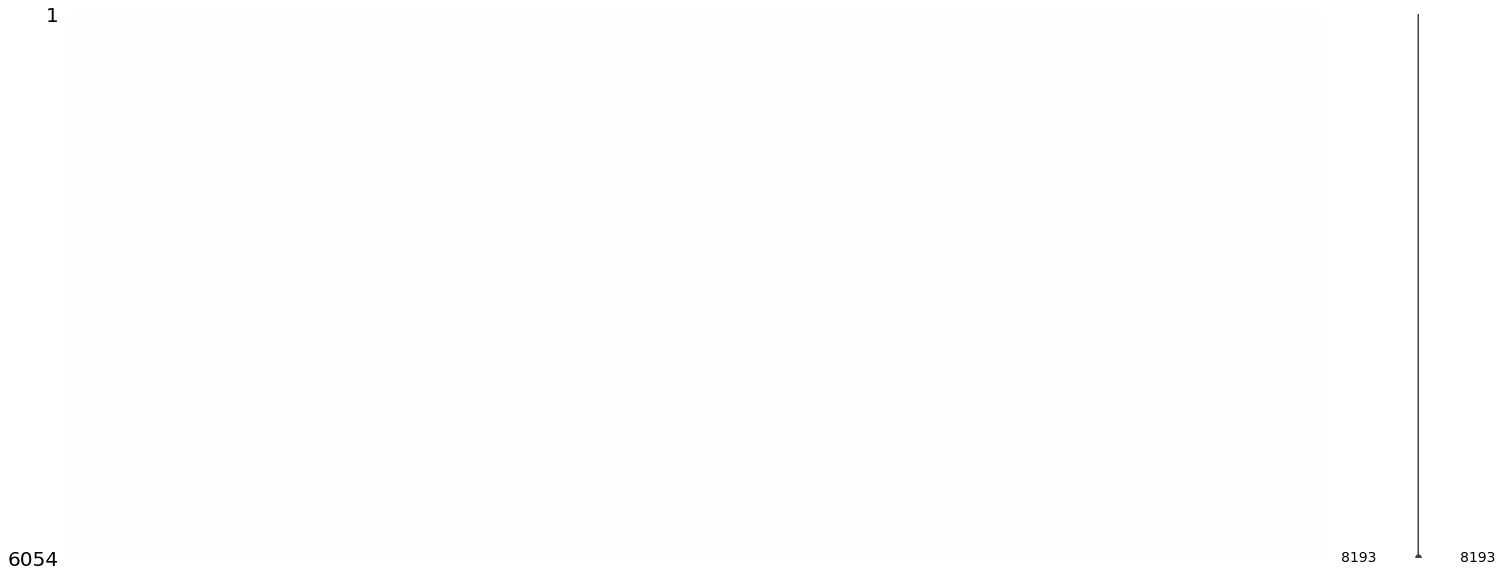

In [ ]:
import missingno as msno
msno.matrix(train)

##### Distribution of Data

Text(0.5, 1.0, 'Distribution of labels of samples')

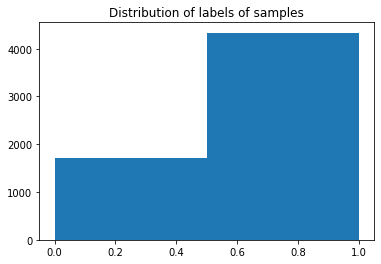

In [ ]:
#train.hist() #Let run for two hours and it did not stop running so I will show histograms for labels and random sample of features
plt.hist(train['1'], bins = 2)
plt.title('Distribution of labels of samples')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f0ad167d0>,
      dtype=object)

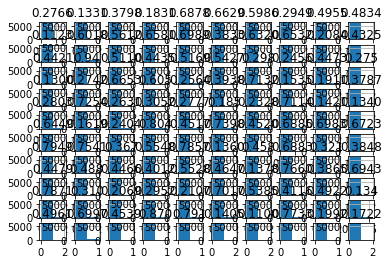

In [42]:
train_fea = train.drop('1', axis=1)
col_sample = train_fea.sample(n=100,axis='columns') #
col_sample.hist(bins = 2)
# each feature has mostly 0 vals

(array([7.58e+03, 3.34e+02, 1.06e+02, 4.00e+01, 2.10e+01, 2.00e+01,
        1.20e+01, 1.10e+01, 6.00e+00, 5.00e+00, 1.10e+01, 5.00e+00,
        7.00e+00, 1.00e+00, 2.00e+00, 3.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 3.00e+00, 4.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        1.00e+00, 3.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 3.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 4.00e+00]),
 array([1.0000e+00, 1.5230e+02, 3.0360e+02, 4.5490e+02, 6.0620e+02,
        7.5750e+02, 9.0880e+02, 1.0601e+03, 1.2114e+03, 1.3627e+03,
        1.5140e+03, 1.6653e+03, 1.8166e+03, 1.9679e+03, 2.1192e+03,
        2.2705e+03, 2.4218e+03, 2.5731e+03, 2.7244e+03, 2.8757e+03,
        3.0270e+03, 3.1783e+03, 3.3296e+03, 3.4809e+03, 3.6322e+03,
        3.7835e+03, 3.9348e+03, 4.0861e+03, 4.2374e+03, 4.3887e+03,
        4.5400e+03, 4.6913e+03, 4.8426e+03, 4.9939e+03, 5.1452e+03,
        5.2965e+03, 5.4478e+03, 5.5991e+03, 5.7504e+03, 5.9017e+03

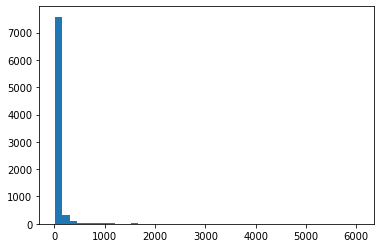

In [38]:
count_row = np.count_nonzero(train_fea, axis=0)
plt.hist(count_row, bins=40)
#number of nonzero values of features in each sample. There are ~8000 features, and most of the features in each sample have a zero value

{'boxes': [<matplotlib.lines.Line2D at 0x7f5f08748290>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5f0a2eb510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f0a2dd310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f0a2bf310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5f08748a10>,
  <matplotlib.lines.Line2D at 0x7f5f08748b50>]}

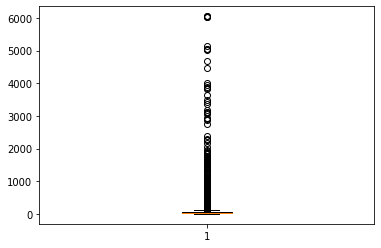

In [39]:
plt.boxplot(count_row)

(array([2.000e+00, 9.000e+00, 1.030e+02, 2.350e+02, 8.050e+02, 1.269e+03,
        8.780e+02, 1.106e+03, 7.080e+02, 4.340e+02, 2.880e+02, 1.620e+02,
        4.800e+01, 4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  3.  ,  18.85,  34.7 ,  50.55,  66.4 ,  82.25,  98.1 , 113.95,
        129.8 , 145.65, 161.5 , 177.35, 193.2 , 209.05, 224.9 , 240.75,
        256.6 , 272.45, 288.3 , 304.15, 320.  ]),
 <a list of 20 Patch objects>)

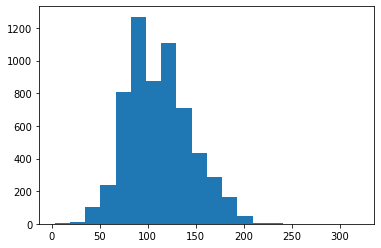

In [41]:
count_col = np.count_nonzero(train_fea, axis=1)
plt.hist(count_col, bins=20)
# looking at number of nonzero values in each feature 

{'boxes': [<matplotlib.lines.Line2D at 0x7f5f05ea0690>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5f062ee450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f063e5690>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f063e5610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5f05ea0910>,
  <matplotlib.lines.Line2D at 0x7f5f062eec50>]}

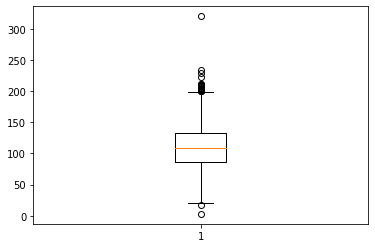

In [40]:
plt.boxplot(count_col)
# the number of nonzero values in each feature looks kind of normally distributed with 50% a little above 100 non-zero vals. There is some skew, but what is interesting is there is ~6000 samples but the distribution is centered in the 100s

##### Correlation of Features

In [18]:
corr = train_fea.corr()
corr.style.background_gradient(cmap='coolwarm')
# took 2 hrs and then didnt finish running

KeyboardInterrupt: ignored